In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates, ticker

In [21]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
total = pd.read_csv('./CSV/한국가스공사_시간별_공급량_20181231.csv', encoding='cp949')
test = pd.read_csv('./CSV/235830_가스공급량 수요예측 모델개발_data/test.csv')
submission = pd.read_csv('./CSV/235830_가스공급량 수요예측 모델개발_data/sample_submission.csv')

In [3]:
total.head(3)

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505


In [4]:
test.head(3)

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A


In [5]:
submission.head(3)

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0


In [6]:
total["구분"].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [7]:
d_map = {}
for i, d in enumerate(total["구분"].unique()) :
    d_map[d] = i
total["구분"] = total["구분"].map(d_map)

In [8]:
total.head(3)

,연월일,시간,구분,공급량
0,2013-01-01,1,0,2497.129
1,2013-01-01,2,0,2363.265
2,2013-01-01,3,0,2258.505


In [9]:
total["연월일"] = pd.to_datetime(total["연월일"])

total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday

train_years = [2013, 2014, 2015, 2016, 2017]
val_years = [2018]

train = total[total['year'].isin(train_years)]
val = total[total['year'].isin(val_years)]

features = ['구분', 'month', 'day', 'weekday', '시간']
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [11]:
test['일자'] = test['일자|시간|구분'].str.split(' ').str[0]
test['시간'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['구분'] = test['일자|시간|구분'].str.split(' ').str[2]

test['일자'] = pd.to_datetime(test['일자'])
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['weekday'] = test['일자'].dt.weekday

test['구분'] = test['구분'].map(d_map)

test_x = test[features]  # features = ['구분', 'month', 'day', 'weekday', '시간']

test_x.head(3)

,구분,month,day,weekday,시간
0,0,1,1,1,1
1,0,1,1,1,2
2,0,1,1,1,3


In [12]:
total.head(3)

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1


In [13]:
test.head(3)

,일자|시간|구분,일자,시간,구분,year,month,day,weekday
0,2019-01-01 01 A,2019-01-01,1,0,2019,1,1,1
1,2019-01-01 02 A,2019-01-01,2,0,2019,1,1,1
2,2019-01-01 03 A,2019-01-01,3,0,2019,1,1,1


In [14]:
submission.head(3)

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0


In [15]:
test_x.head(3)

,구분,month,day,weekday,시간
0,0,1,1,1,1
1,0,1,1,1,2
2,0,1,1,1,3


In [17]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  datetime64[ns]
 1   시간       368088 non-null  int64         
 2   구분       368088 non-null  int64         
 3   공급량      368088 non-null  float64       
 4   year     368088 non-null  int64         
 5   month    368088 non-null  int64         
 6   day      368088 non-null  int64         
 7   weekday  368088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 22.5 MB


<AxesSubplot:xlabel='날짜', ylabel='공급량'>

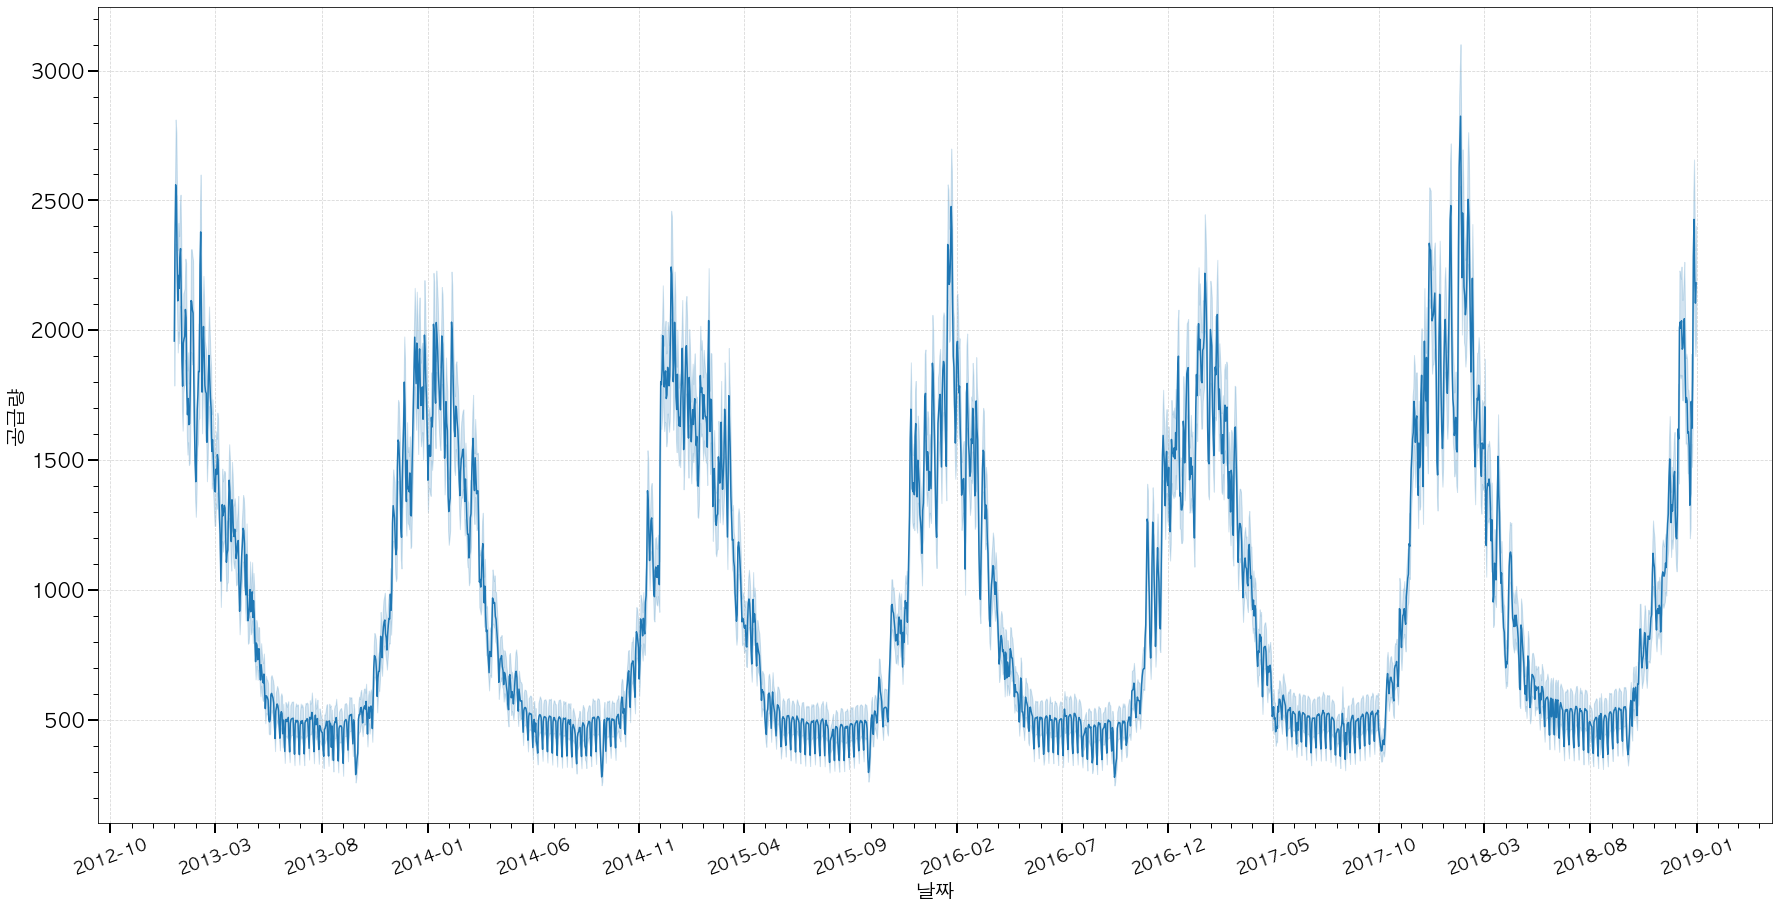

In [23]:
plt.figure(figsize = (30, 15))
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 5))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(500)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("공급량", fontsize = 20)

sns.lineplot(x = "연월일", y = "공급량", data = total)

# plt.gcf().savefig("./PNG/뉴스 개수 이동평균선.png")